In [1]:
# import dependencies
import pandas as pd
import json
from pprint import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
# create new columns to store data in city_df dataframe
#city = cities
#len(city)
city_df= pd.DataFrame(cities).reset_index()
city_df=city_df.rename(columns={0:'City_Name'})
city_df=city_df.loc[:, ["City_Name"]]
city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Long'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""
#city_df.head()


In [14]:
# Extract the required information from the API by creating base_url and query strings.
# Use the for loop to go through all the cities extracted in the dataframe city_df
base_url= "http://api.openweathermap.org/data/2.5/weather?"
#count=0
#x =1

    
for index, row in city_df.iterrows():

    # get city type from df
    city_type = row['City_Name']

    # add keyword to params dict
   
    query_url = base_url +"appid=" + api_key  + "&q=" + city_type + "&units=imperial"
    print(query_url)
    # assemble url and make API request
   
    response = requests.get(query_url).json()
    result = response 
    if result["cod"] != 200: 
                
        print(f"City not found : Skipping")
    else:
            
        city_df.loc[index, 'Cloudiness'] = result['clouds']['all']
        city_df.loc[index, 'Country'] = result['sys']['country']
        city_df.loc[index, 'Date'] = result['dt'] 
        city_df.loc[index, 'Humidity'] = result['main']['humidity']        
        city_df.loc[index, 'Lat'] = result['coord']['lat']
        city_df.loc[index, 'Long'] = result['coord']['lon']
        city_df.loc[index, 'Max_Temp'] = result['main']['temp_max']
        city_df.loc[index, 'Wind_Speed'] =result['wind']['speed']

  
       
            
        state = f'Processing Record {index} of set 1| {city_type}.'
        print(state)
        print(query_url)    
        
 
        


http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=cape town&units=imperial
Processing Record 0 of set 1| cape town.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=cape town&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=thompson&units=imperial
Processing Record 1 of set 1| thompson.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=thompson&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=flinders&units=imperial
Processing Record 2 of set 1| flinders.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=flinders&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=sechura&units=imperial
Processing Record 3 of set 1| sechura.
http://api.openweathermap.org/data/2.5/weather?appid=18

Processing Record 34 of set 1| port alfred.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=port alfred&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mayumba&units=imperial
Processing Record 35 of set 1| mayumba.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mayumba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=touros&units=imperial
Processing Record 36 of set 1| touros.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=touros&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=iskateley&units=imperial
Processing Record 37 of set 1| iskateley.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=iskateley&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 68 of set 1| codrington.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=codrington&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=coihaique&units=imperial
Processing Record 69 of set 1| coihaique.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=coihaique&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aljezur&units=imperial
Processing Record 70 of set 1| aljezur.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aljezur&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hermanus&units=imperial
Processing Record 71 of set 1| hermanus.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hermanus&units=imperial
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 100 of set 1| upernavik.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=upernavik&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=puerto ayora&units=imperial
Processing Record 101 of set 1| puerto ayora.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=puerto ayora&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aklavik&units=imperial
Processing Record 102 of set 1| aklavik.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aklavik&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aykhal&units=imperial
Processing Record 103 of set 1| aykhal.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=aykhal&units=imperial
http://api.openweathermap.org/data/2.5/weat

Processing Record 136 of set 1| broome.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=broome&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=casablanca&units=imperial
Processing Record 137 of set 1| casablanca.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=casablanca&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tabiauea&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=grand gaube&units=imperial
Processing Record 139 of set 1| grand gaube.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=grand gaube&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=hamilton&units=imperial
Processing Record 140 of set 1| hamilton.
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vila franca do campo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=masallatah&units=imperial
Processing Record 169 of set 1| masallatah.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=masallatah&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=saint-georges&units=imperial
Processing Record 170 of set 1| saint-georges.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=saint-georges&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kruisfontein&units=imperial
Processing Record 171 of set 1| kruisfontein.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kruisfontein&units=imperial
http://api.openweathermap.org/data/2.5/weathe

Processing Record 202 of set 1| general roca.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=general roca&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mumford&units=imperial
Processing Record 203 of set 1| mumford.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mumford&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=oranjemund&units=imperial
Processing Record 204 of set 1| oranjemund.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=oranjemund&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tianpeng&units=imperial
Processing Record 205 of set 1| tianpeng.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=tianpeng&units=imperial
http://api.openweathermap.org/data/2.

Processing Record 234 of set 1| comrat.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=comrat&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bargal&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=erenhot&units=imperial
Processing Record 236 of set 1| erenhot.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=erenhot&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bambous virieux&units=imperial
Processing Record 237 of set 1| bambous virieux.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=bambous virieux&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=det udom&units=imperial
Processing Record 238 of set 1| det udom.
http://api

Processing Record 268 of set 1| mazyr.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mazyr&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dunedin&units=imperial
Processing Record 269 of set 1| dunedin.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=dunedin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kalmunai&units=imperial
Processing Record 270 of set 1| kalmunai.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kalmunai&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kensington&units=imperial
Processing Record 271 of set 1| kensington.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kensington&units=imperial
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 301 of set 1| petropavlovka.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=petropavlovka&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=inverell&units=imperial
Processing Record 302 of set 1| inverell.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=inverell&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=coulihaut&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=qandala&units=imperial
Processing Record 304 of set 1| qandala.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=qandala&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=sumter&units=imperial
Processing Record 305 of set 1| sumter.
http://api.openwea

Processing Record 336 of set 1| cherskiy.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=cherskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=asau&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=novikovo&units=imperial
Processing Record 338 of set 1| novikovo.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=novikovo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=riwaka&units=imperial
Processing Record 339 of set 1| riwaka.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=riwaka&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=mehamn&units=imperial
Processing Record 340 of set 1| mehamn.
http://api.openweathermap.org/data/2

Processing Record 369 of set 1| carlsbad.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=carlsbad&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ngorongoro&units=imperial
Processing Record 370 of set 1| ngorongoro.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ngorongoro&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=polyarnyy&units=imperial
Processing Record 371 of set 1| polyarnyy.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=polyarnyy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=willowmore&units=imperial
Processing Record 372 of set 1| willowmore.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=willowmore&units=imperial
http://api.openweathermap.org/dat

Processing Record 402 of set 1| windsor.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=windsor&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=daru&units=imperial
Processing Record 403 of set 1| daru.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=daru&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kulachi&units=imperial
Processing Record 404 of set 1| kulachi.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kulachi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=viligili&units=imperial
City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=barcelos&units=imperial
Processing Record 406 of set 1| barcelos.
http://api.openweathermap.org/data/2.5/

City not found : Skipping
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=skjervoy&units=imperial
Processing Record 436 of set 1| skjervoy.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=skjervoy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=banda aceh&units=imperial
Processing Record 437 of set 1| banda aceh.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=banda aceh&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=palana&units=imperial
Processing Record 438 of set 1| palana.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=palana&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=ornskoldsvik&units=imperial
Processing Record 439 of set 1| ornskoldsvik.
http://api.ope

Processing Record 469 of set 1| champerico.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=champerico&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=along&units=imperial
Processing Record 470 of set 1| along.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=along&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=araouane&units=imperial
Processing Record 471 of set 1| araouane.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=araouane&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kalangala&units=imperial
Processing Record 472 of set 1| kalangala.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=kalangala&units=imperial
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 501 of set 1| padinska skela.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=padinska skela&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=caravelas&units=imperial
Processing Record 502 of set 1| caravelas.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=caravelas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=richards bay&units=imperial
Processing Record 503 of set 1| richards bay.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=richards bay&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=palmer&units=imperial
Processing Record 504 of set 1| palmer.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=palmer&units=imperial
http://api.openweathermap.o

Processing Record 532 of set 1| vyshkov.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vyshkov&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=margate&units=imperial
Processing Record 533 of set 1| margate.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=margate&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=glubczyce&units=imperial
Processing Record 534 of set 1| glubczyce.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=glubczyce&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vista hermosa&units=imperial
Processing Record 535 of set 1| vista hermosa.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=vista hermosa&units=imperial
http://api.openweathermap.org/data/

Processing Record 564 of set 1| la seyne-sur-mer.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=la seyne-sur-mer&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=atherton&units=imperial
Processing Record 565 of set 1| atherton.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=atherton&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=guarapari&units=imperial
Processing Record 566 of set 1| guarapari.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=guarapari&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nabire&units=imperial
Processing Record 567 of set 1| nabire.
http://api.openweathermap.org/data/2.5/weather?appid=18d1842e3e188be28c717133d2674cc5&q=nabire&units=imperial
http://api.openweathermap.org/data/

In [15]:
#keep track of all the information in city_df by using the count function.
city_df.count()

City_Name     596
Cloudiness    540
Country       596
Date          596
Humidity      540
Lat           540
Long          540
Max Temp      596
Wind Speed    596
Max_Temp      540
Wind_Speed    540
dtype: int64

In [16]:
#Export data frame to csv file
a=city_df.to_csv('output_data\cities.csv')
#city_df.head()


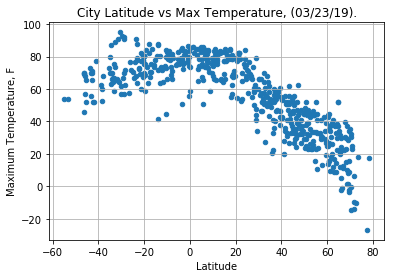

In [17]:
#convert the strings in the to numeric values using pd.to_numeric() function
# use the graph function in matplotlip to plot the graphs shown below.
city_df.Lat=pd.to_numeric(city_df.Lat)
city_df.Cloudiness=pd.to_numeric(city_df.Cloudiness)
city_df.Humidity=pd.to_numeric(city_df.Humidity)
city_df.Long=pd.to_numeric(city_df.Long)
city_df.Max_Temp=pd.to_numeric(city_df.Max_Temp)
city_df.Wind_Speed=pd.to_numeric(city_df.Wind_Speed)
#city_df.Lat=pd.to_numeric(city_df.Lat)
#city_df.Cloudiness=pd.to_numeric(city_df.Cloudiness)
city_df.plot.scatter(x=['Lat'],y=['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature, F')
today =datetime.date.today().strftime("%x")
plt.title(f'City Latitude vs Max Temperature, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Max Temperature')

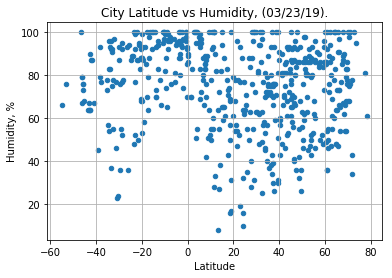

In [18]:
city_df.plot.scatter(x=['Lat'],y=['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity, %')
plt.title(f'City Latitude vs Humidity, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Humidity')

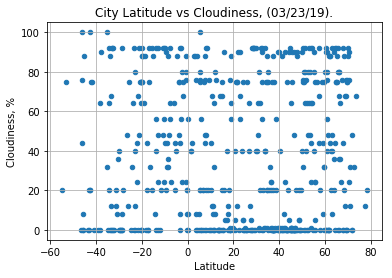

In [19]:
city_df.plot.scatter(x=['Lat'],y=['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness, %')
plt.title(f'City Latitude vs Cloudiness, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Cloudiness')

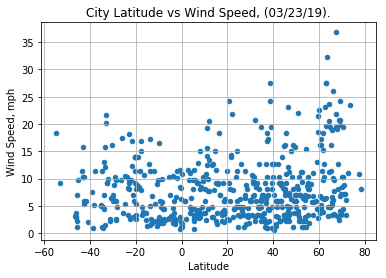

In [20]:
city_df.plot.scatter(x=['Lat'],y=['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, mph')
plt.title(f'City Latitude vs Wind Speed, ({today}).')
plt.grid(b=bool)
plt.savefig('City Latitude vs Wind Speed')

In [21]:
#Observations
#1 The temperature increases as one moves towards the equator. Showing the change in seasons northern hemisphere is in the winter months and the temperature is cooler than the southern hemisphere experiencing warmer temperature
#2 The wind speed along the equator is not to eractic today.The maximum wind speed observed from the cities along the equator is approximately 12mph
#3 Humidity seems to increase as one moves towards the equator
# I do believe there are better graphs and questions that can be posed to show what is going on along the equator.The scatter plots do not tell much or show major trends.